# Customer Churn Analysis in Telecom Industry

### Introduction:
In the highly competitive telecommunications industry, understanding the factors driving customer churn is crucial for maintaining a robust customer base and ensuring long-term profitability. This analysis delves into various aspects of customer data to identify key indicators of churn and suggest actionable strategies for enhancing customer retention. By examining relationships between customer attributes and churn, we aim to uncover patterns and insights that can inform more effective business decisions.

1. **Title Page**:
   - Title: Customer Churn Analysis in Telecom Industry
   - Subtitle: Insights from Customer Data Analysis
   - Date: [Insert Date]
   - Author: Swastik Tripathi
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [2]:
data = pd.read_csv('telco.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [5]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [6]:
data.sample(5)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
4359,6988-CJEYV,Male,56,No,No,No,No,0,United States,California,Crows Landing,95313,37.435664,-121.049056,1508,Q3,No,0,49,Offer B,Yes,45.46,Yes,Yes,Fiber Optic,27,No,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,98.7,4920.55,0.0,0,2227.54,7148.09,3,Stayed,No,79,6148,NaN,NaN
141,1587-FKLZB,Male,79,No,Yes,Yes,No,0,United States,California,Santa Barbara,93101,34.419203,-119.710008,31727,Q3,Yes,1,66,Offer A,Yes,28.86,Yes,Yes,Fiber Optic,25,No,No,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Credit Card,99.5,6822.15,0.0,0,1904.76,8726.91,1,Churned,Yes,96,4479,Competitor,Competitor had better devices
730,4526-ZJJTM,Female,72,No,Yes,Yes,No,0,United States,California,San Mateo,94403,37.538309,-122.305109,37926,Q3,Yes,1,25,NaN,Yes,19.44,No,Yes,Fiber Optic,4,No,Yes,Yes,No,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,88.4,2191.15,0.0,0,486.00,2677.15,3,Stayed,No,51,4849,NaN,NaN
398,5383-MMTWC,Female,75,No,Yes,Yes,No,0,United States,California,Oakley,94561,37.999406,-121.686241,27607,Q3,Yes,1,8,NaN,Yes,46.05,Yes,Yes,Fiber Optic,22,No,No,No,No,No,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,84.0,613.40,0.0,0,368.40,981.80,3,Churned,Yes,91,4819,Dissatisfaction,Limited range of services
1306,2207-NHRJK,Male,58,No,No,No,No,0,United States,California,Carmel,93923,36.460611,-121.852507,13121,Q3,No,0,1,Offer E,Yes,1.28,No,Yes,DSL,27,No,Yes,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,50.8,50.80,0.0,0,1.28,52.08,1,Churned,Yes,85,3718,Competitor,Competitor had better devices


### Cleaing dataset

In [7]:
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [8]:
data['Offer'] = data['Offer'].fillna('No offer')

In [9]:
(data[data['Internet Type'].isnull()]['Internet Service'] == 'Yes').sum()

0

In [10]:
data['Internet Service'].unique()

array(['Yes', 'No'], dtype=object)

means that the column 'Internet Type' is only Null when 'Internet Service' is 'No'. it means whenever 'Internet Type' is Null, we can change it to 'No Internet'

In [11]:
data['Internet Type'] = data['Internet Type'].fillna('No Internet')

In [12]:
(data[data['Churn Category'].isnull()]['Churn Label'] == 'Yes').sum()

0

In [13]:
(data[data['Churn Reason'].isnull()]['Churn Label'] == 'Yes').sum()

0

means 'Churn Category' and 'Churn reason' is only Null if 'Customer Label' indicates that the customer hasn't churned

In [14]:
data['Churn Category'] = data['Churn Category'].fillna('Not Churned')

In [15]:
data['Churn Reason'] = data['Churn Reason'].fillna('Not Churned')

In [16]:
data.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download  

In [17]:
data = data.drop('Under 30', axis=1)

since 'Under 30' column can be derived from 'Age' column, it becomes redundant

In [18]:
data[data['Senior Citizen'] == 'No'].sort_values('Age', ascending=False).head(1)

,Customer ID,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
5850,8294-UIMBA,Female,64,No,No,No,0,United States,California,Northridge,91325,34.236683,-118.517588,32307,Q3,No,0,30,No offer,Yes,2.67,No,Yes,Fiber Optic,27,No,No,No,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,94.4,2638.1,0.0,0,80.1,2718.2,5,Stayed,No,68,4584,Not Churned,Not Churned


this means that people above 64 year old are considered senior citizen. since we can determine senior citizen status from age attribute, we can drop this column.

In [19]:
data.drop(['Senior Citizen'], axis=1, inplace=True)

## convert to categorical values

In [20]:
data['Gender'] = data['Gender'].astype('category')
data['Married'] = data['Married'].astype('category')
data['Dependents'] = data['Dependents'].astype('category')
data['State'] = data['State'].astype('category')
data['Quarter'] = data['Quarter'].astype('category')
data['Referred a Friend'] = data['Referred a Friend'].astype('category')
data['Phone Service'] = data['Phone Service'].astype('category')
data['Multiple Lines'] = data['Multiple Lines'].astype('category')
data['Internet Service'] = data['Internet Service'].astype('category')
data['Online Security'] = data['Online Security'].astype('category')
data['Online Backup'] = data['Online Backup'].astype('category')
data['Device Protection Plan'] = data['Device Protection Plan'].astype('category')
data['Premium Tech Support'] = data['Premium Tech Support'].astype('category')
data['Streaming TV'] = data['Streaming TV'].astype('category')
data['Streaming Movies'] = data['Streaming Movies'].astype('category')
data['Streaming Music'] = data['Streaming Music'].astype('category')
data['Unlimited Data'] = data['Unlimited Data'].astype('category')
data['Paperless Billing'] = data['Paperless Billing'].astype('category')
data['Payment Method'] = data['Payment Method'].astype('category')
data['Customer Status'] = data['Customer Status'].astype('category')
data['Churn Label'] = data['Churn Label'].astype('category')

In [21]:
data.sample()

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
1626,9492-TOKRI,Female,55,No,No,0,United States,California,Dinuba,93618,36.523619,-119.386868,24206,Q3,No,0,18,No offer,Yes,13.65,Yes,Yes,Fiber Optic,5,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,90.0,1527.35,0.0,0,245.7,1773.05,1,Churned,Yes,90,2708,Competitor,Competitor had better devices


In [22]:
categorical_columns = ['Gender', 'Married', 'Dependents',
                       'Referred a Friend', 'Phone Service', 'Multiple Lines',
                       'Internet Service', 'Online Security', 'Online Backup', 
                       'Device Protection Plan', 'Premium Tech Support', 
                       'Streaming TV', 'Streaming Movies', 'Streaming Music', 
                       'Unlimited Data', 'Paperless Billing', 
                       'Payment Method', 'Customer Status', 'Churn Label']

dummies_gender = pd.get_dummies(data['Gender'], prefix='Gender', drop_first=True)
dummies_married = pd.get_dummies(data['Married'], prefix='Married', drop_first=True)
dummies_dependents = pd.get_dummies(data['Dependents'], prefix='Dependents', drop_first=True)
dummies_referred_friend = pd.get_dummies(data['Referred a Friend'], prefix='Referred a Friend', drop_first=True)
dummies_phone_service = pd.get_dummies(data['Phone Service'], prefix='Phone Service', drop_first=True)
dummies_multiple_lines = pd.get_dummies(data['Multiple Lines'], prefix='Multiple Lines', drop_first=True)
dummies_internet_service = pd.get_dummies(data['Internet Service'], prefix='Internet Service', drop_first=True)
dummies_online_security = pd.get_dummies(data['Online Security'], prefix='Online Security', drop_first=True)
dummies_online_backup = pd.get_dummies(data['Online Backup'], prefix='Online Backup', drop_first=True)
dummies_device_protection_plan = pd.get_dummies(data['Device Protection Plan'], prefix='Device Protection Plan', drop_first=True)
dummies_premium_tech_support = pd.get_dummies(data['Premium Tech Support'], prefix='Premium Tech Support', drop_first=True)
dummies_streaming_tv = pd.get_dummies(data['Streaming TV'], prefix='Streaming TV', drop_first=True)
dummies_streaming_movies = pd.get_dummies(data['Streaming Movies'], prefix='Streaming Movies', drop_first=True)
dummies_streaming_music = pd.get_dummies(data['Streaming Music'], prefix='Streaming Music', drop_first=True)
dummies_unlimited_data = pd.get_dummies(data['Unlimited Data'], prefix='Unlimited Data', drop_first=True)
dummies_paperless_billing = pd.get_dummies(data['Paperless Billing'], prefix='Paperless Billing', drop_first=True)
dummies_payment_method = pd.get_dummies(data['Payment Method'], prefix='Payment Method', drop_first=True)
dummies_customer_status = pd.get_dummies(data['Customer Status'], prefix='Customer Status')
dummies_churn_label = pd.get_dummies(data['Churn Label'], prefix='Churn Label', drop_first=True)

data = pd.concat([data,
                  dummies_gender,
                  dummies_married,
                  dummies_dependents,
                  dummies_referred_friend,
                  dummies_phone_service,
                  dummies_multiple_lines,
                  dummies_internet_service,
                  dummies_online_security,
                  dummies_online_backup,
                  dummies_device_protection_plan,
                  dummies_premium_tech_support,
                  dummies_streaming_tv,
                  dummies_streaming_movies,
                  dummies_streaming_music,
                  dummies_unlimited_data,
                  dummies_paperless_billing,
                  dummies_payment_method,
                  dummies_customer_status,
                  dummies_churn_label,], axis=1)

data.drop(categorical_columns, axis=1, inplace=True)

In [23]:
data.sample(5)

,Customer ID,Age,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Internet Type,Avg Monthly GB Download,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV,Churn Category,Churn Reason,Gender_Male,Married_Yes,Dependents_Yes,Referred a Friend_Yes,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Online Security_Yes,Online Backup_Yes,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Customer Status_Churned,Customer Status_Joined,Customer Status_Stayed,Churn Label_Yes
6758,0083-PIVIK,25,0,United States,California,Tulelake,96134,41.813521,-121.492666,2595,Q3,0,64,No offer,5.49,DSL,69,One Year,81.25,5567.55,0.0,40,351.36,5958.91,3,67,4761,Not Churned,Not Churned,True,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False
93,3254-YRILK,74,0,United States,California,Dobbins,95935,39.381174,-121.211910,614,Q3,0,19,Offer D,39.97,Fiber Optic,9,Month-to-Month,88.20,1775.80,0.0,0,759.43,2535.23,1,69,5683,Competitor,Competitor had better devices,True,False,False,False,True,True,True,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True
1920,8945-GRKHX,41,0,United States,California,Santa Barbara,93110,34.437945,-119.771910,15757,Q3,0,1,Offer E,46.09,Fiber Optic,10,Month-to-Month,78.65,78.65,0.0,0,46.09,124.74,1,81,2728,Competitor,Competitor had better devices,False,False,False,False,True,False,True,False,False,False,False,False,True,True,True,False,False,False,True,False,False,True
2124,1502-XFCVR,57,0,United States,California,Los Angeles,90038,34.088017,-118.327168,32562,Q3,0,58,Offer B,14.99,Fiber Optic,12,One Year,106.45,6145.85,0.0,0,869.42,7015.27,1,82,5902,Competitor,Competitor offered higher download speeds,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,False,True,False,False,True
3055,3174-AKMAS,61,0,United States,California,Hume,93628,36.807595,-118.901544,93,Q3,1,46,No offer,37.02,DSL,6,Two Year,64.20,3009.50,0.0,0,1702.92,4712.42,4,41,4699,Not Churned,Not Churned,False,True,False,True,True,False,True,False,True,False,True,True,False,False,True,True,True,False,False,False,True,False


## Visualizing key features

C:\Users\SWASTIK\AppData\Local\Temp\ipykernel_14356\2403011004.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  churnChart.set_xticklabels(['Not Churned', 'Churned'])


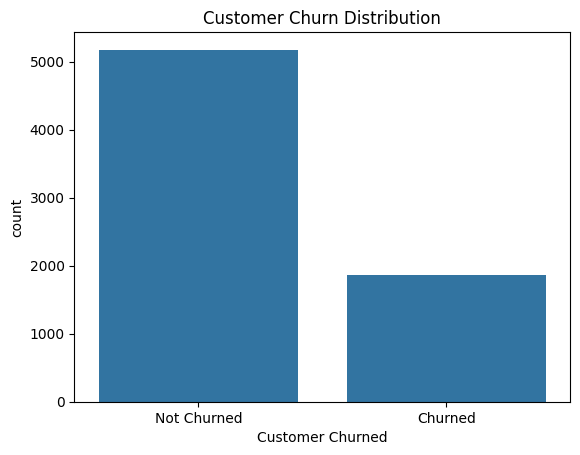

In [24]:
churnChart = sns.countplot(x='Churn Label_Yes', data=data)
churnChart.set_xticklabels(['Not Churned', 'Churned'])
churnChart.set_title('Customer Churn Distribution')
churnChart.set_xlabel('Customer Churned')
plt.show()

**Findings:** The chart shows that about one-fourth of the customers have churned.<br>
**Key Insight:** The churn rate is significant, with 25% of customers leaving the service. This indicates a potential issue with customer retention.

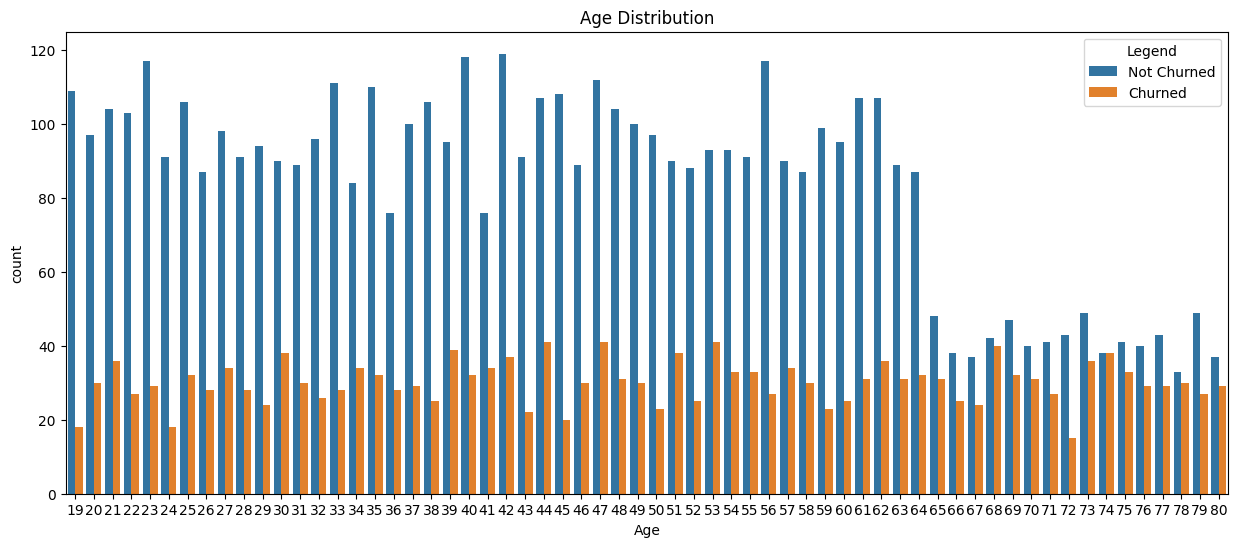

In [25]:
plt.figure(figsize=(15,6))
ageChart = sns.countplot(x='Age', data=data, hue='Churn Label_Yes')
ageChart.set_title('Age Distribution')
plt.legend(title='Legend', labels=['Not Churned', 'Churned'])
plt.show()

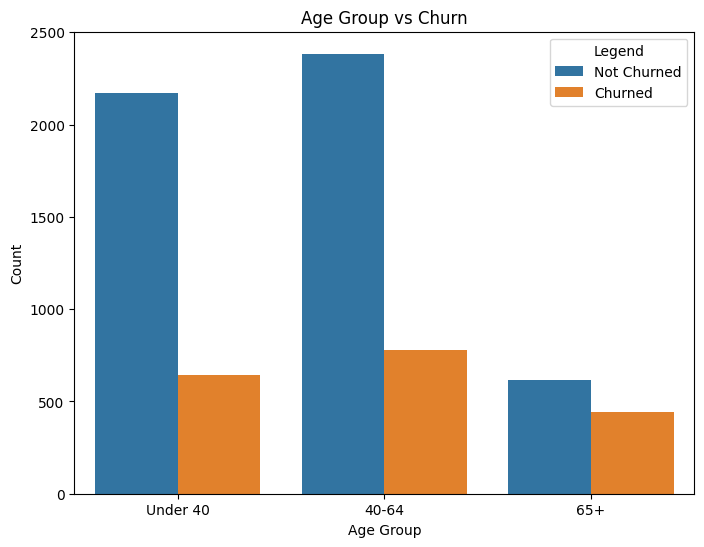

In [26]:
data['Age Group'] = pd.cut(data['Age'], bins=[0, 40, 65, 100], labels=['Under 40', '40-64', '65+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', hue='Churn Label_Yes', data=data)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group vs Churn')
plt.legend(title='Legend', labels=['Not Churned', 'Churned'])
plt.show()
data.drop(['Age Group'], axis=1, inplace=True)

**Findings:** Most customers are aged between 19 to 64. Across all age groups, the number of non-churning customers is about three times the number of churned customers. However, churn rate increases with age.<br>
**Key Insight:** Older customers tend to churn more frequently. This could imply that services might not be meeting the needs of older demographics effectively.

C:\Users\SWASTIK\AppData\Local\Temp\ipykernel_14356\483836313.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  genderChart.set_xticklabels(['Female', 'Male'])


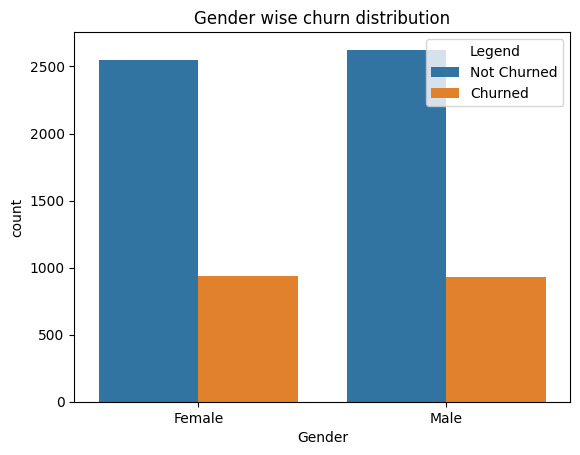

In [27]:
genderChart = sns.countplot(x='Gender_Male', hue='Churn Label_Yes', data=data)
genderChart.set_title('Gender wise churn distribution')
genderChart.set_xlabel('Gender')
genderChart.set_xticklabels(['Female', 'Male'])
genderChart.legend(title='Legend', labels=['Not Churned', 'Churned'])
plt.show()

**Findings:** The distribution is almost equal between male and female customers. In both cases, the majority are non-churners.<br>
**Key Insight:** Gender does not significantly influence churn rates as both males and females exhibit similar behaviors regarding churn.

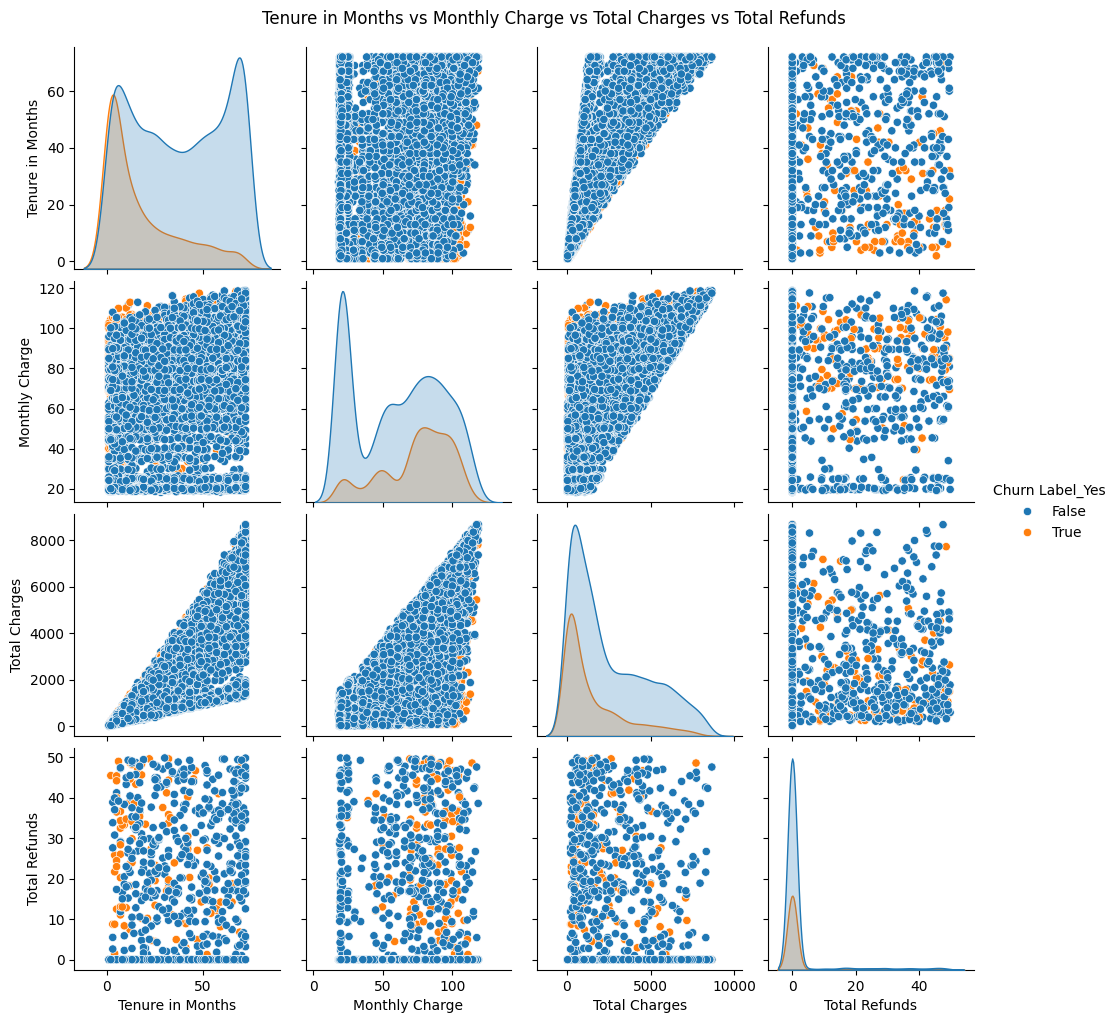

In [28]:
pairChart = sns.pairplot(data, hue='Churn Label_Yes', vars=['Tenure in Months', 'Monthly Charge', 'Total Charges', 'Total Refunds'])
pairChart.fig.suptitle('Tenure in Months vs Monthly Charge vs Total Charges vs Total Refunds', y=1.02)
plt.show()

**Findings**:
1. **Tenure in Months vs. Monthly Charge**:
   - Higher churn is observed among customers with shorter tenures.
   - Longer-tenured customers show lower churn rates.

2. **Tenure in Months vs. Total Charges**:
   - Positive correlation between tenure and total charges.
   - Higher churn for customers with shorter tenures and lower total charges.

3. **Tenure in Months vs. Total Refunds**:
   - No strong relationship between tenure and total refunds for churned customers.
   - Slight concentration of churned customers at low refund values.

4. **Monthly Charge vs. Total Charges**:
   - Positive correlation between monthly charges and total charges.
   - Churned customers more prevalent at higher monthly charges.

5. **Monthly Charge vs. Total Refunds**:
   - No clear pattern between monthly charges and total refunds for churned customers.

6. **Total Charges vs. Total Refunds**:
   - No strong correlation between total charges and total refunds.
   - Slight concentration of churned customers with lower total refunds.

7. **Univariate Distributions**:
   - **Tenure in Months**: Higher churn density at lower tenures.
   - **Monthly Charge**: Higher churn at elevated monthly charges.
   - **Total Charges**: Slightly higher churn density at lower total charges.
   - **Total Refunds**: Most customers have low refunds, with churn spread across.

**Key Insights**:
1. **Short Tenure**: Strong indicator of churn. Early engagement is crucial.
2. **High Monthly Charges**: Higher churn suggests the need for reviewing pricing strategies.
3. **Total Refunds**: Not a significant churn factor but still important for customer trust.

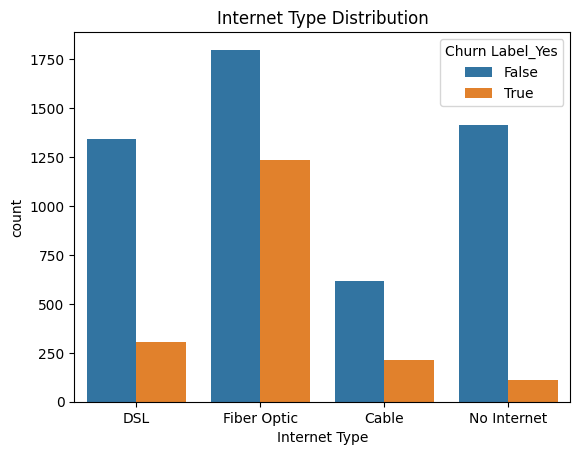

In [29]:
sns.countplot(data=data, x='Internet Type', hue='Churn Label_Yes')
plt.title('Internet Type Distribution')
plt.show()

**Findings:** Most users have fiber optic internet, but these users are most likely to churn. DSL users tend to churn less.<br>
**Key Insight:** Fiber optic users are more likely to churn, suggesting possible issues with the service or competition from other providers.

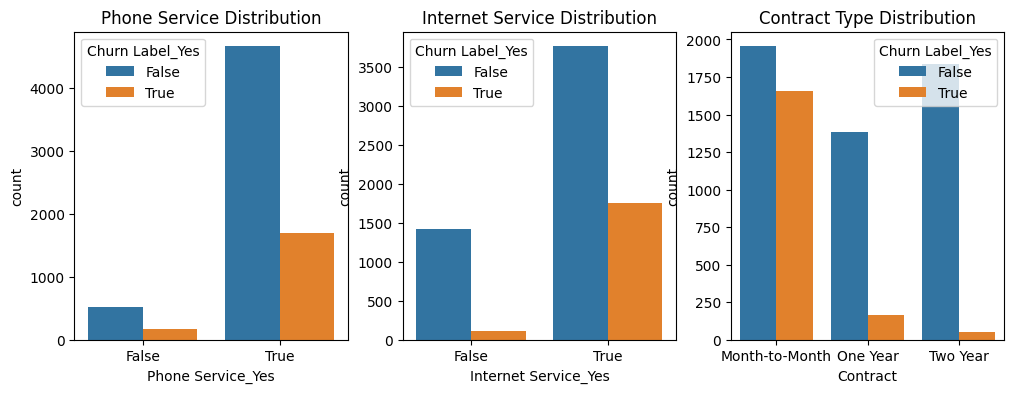

In [30]:
fig, axes = plt.subplots(1,3, figsize=(12,4))

sns.countplot(ax=axes[0], data=data, x='Phone Service_Yes', hue='Churn Label_Yes')
axes[0].set_title('Phone Service Distribution')
sns.countplot(ax=axes[1], data=data, x='Internet Service_Yes', hue='Churn Label_Yes')
axes[1].set_title('Internet Service Distribution')
sns.countplot(ax=axes[2], data=data, x='Contract', hue='Churn Label_Yes')
axes[2].set_title('Contract Type Distribution')
plt.show()

**Phone Service:**<br>
&emsp;**Findings:** Most customers have phone service. The churn rate is higher among those who do not have phone service.<br>
**Internet Service:**<br>
&emsp;**Findings:** Similar to phone service, most customers have internet service, and the churn rate is higher among those who do not have internet service.<br>
**Contract Type:**<br>
&emsp;**Findings:** Customers with month-to-month contracts are more likely to churn compared to those with one or two-year contracts.<br>
**Key Insight:** Longer contracts tend to reduce churn, indicating a need for strategies to encourage long-term commitments.


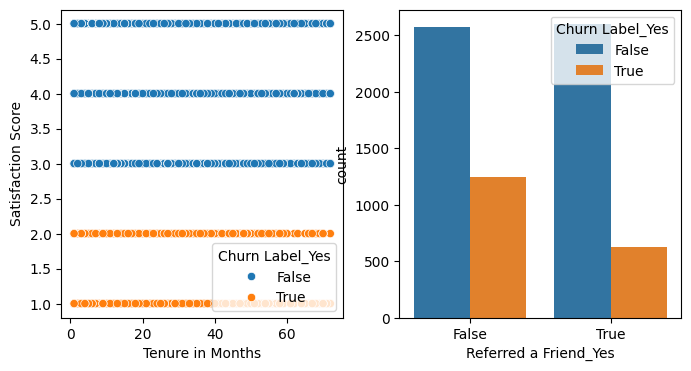

In [31]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
sns.scatterplot(ax=axes[0], x='Tenure in Months', y='Satisfaction Score', data=data, hue='Churn Label_Yes')
sns.countplot(ax=axes[1], x='Referred a Friend_Yes', data=data, hue='Churn Label_Yes')
plt.show()

**Findings:** There is no clear trend between tenure and satisfaction score.<br>
**Key Insight:** Satisfaction scores do not necessarily improve with tenure, indicating that other factors might be influencing customer satisfaction.<br>
**Findings:** Customers who have referred friends are less likely to churn.<br>
**Key Insight:** Referrals can be a strong indicator of customer satisfaction and loyalty.

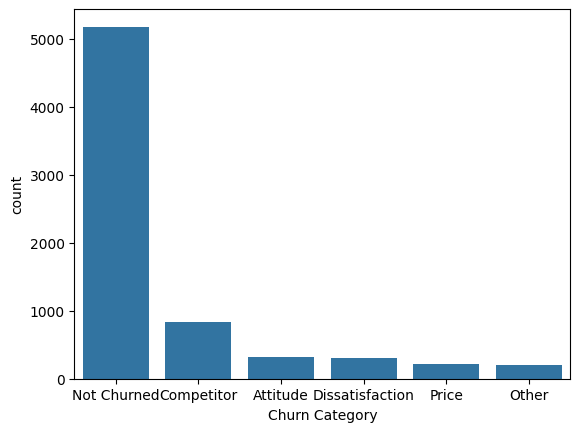

In [32]:
sns.countplot(x='Churn Category', data=data, order=data['Churn Category'].value_counts().index)
plt.show()

**Findings:** Various reasons for churn are visualized, with some categories showing higher churn rates.<br>
**Key Insight:** Understanding specific churn categories can help in addressing targeted issues.

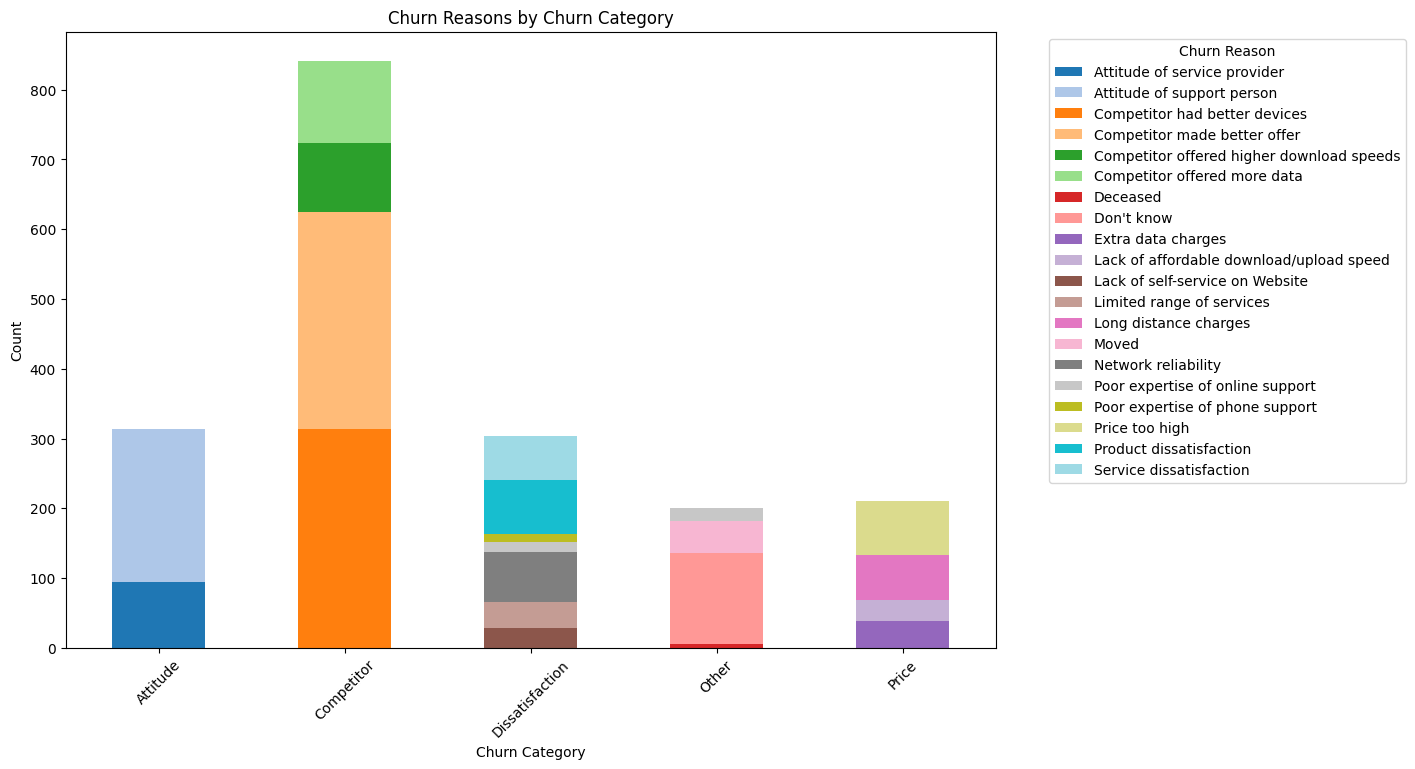

In [33]:
categoryReasonCrosstab = pd.crosstab(data[data['Churn Category'] != 'Not Churned']['Churn Category'], data['Churn Reason'])
categoryReasonCrosstab.plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.title('Churn Reasons by Churn Category')
plt.legend(title='Churn Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

**Findings:** A significant number of customers cited competition as a primary reason for churning. Many customers left because competitors provided superior devices and more attractive offers. Some customers churned because competitors offered better data packages. Another major reason for churn is related to customer support. Customers reported dissatisfaction with the attitude of support staff as a major factor in their decision to leave.<br>
**Key Insight:** The high churn rate due to competitors indicates that the company needs to enhance its device offerings, create more attractive offers, and provide better data packages to stay competitive. The significant number of customers citing poor support staff attitude suggests that improving customer service training and monitoring could reduce churn rates.


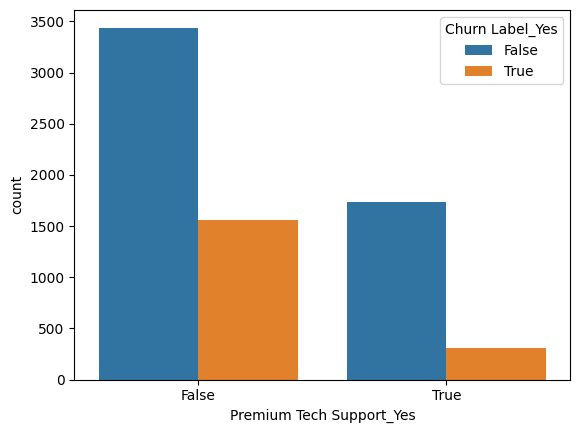

In [34]:
sns.countplot(data=data, x='Premium Tech Support_Yes', hue='Churn Label_Yes')

plt.show()

**Findings:** Customer churn is more prevalent among those without premium tech support. The churn rate is considerably lower among those with tech support.<br>
**Key Insight:** Offering premium tech support can significantly reduce churn rates.

<hr>

### Summary:
This analysis revealed that customer churn is predominantly influenced by factors such as tenure length, monthly charges, and customer support experiences. Short-tenured customers and those with higher monthly charges are more prone to churn. Additionally, competitors offering better devices, more data, and superior customer service were significant reasons for customer churn.

### Recommendations:
1. **Early Engagement**:
   - Enhance early-stage customer support and engagement efforts to reduce churn among new customers.
2. **Pricing Strategy**:
   - Review and potentially revise pricing strategies to ensure high-cost plans deliver sufficient value.
3. **Customer Support**:
   - Invest in training customer support personnel to improve their interaction with customers, addressing the dissatisfaction leading to churn.
4. **Competitor Analysis**:
   - Continuously monitor competitors' offerings and adapt to meet or exceed them in terms of value, technology, and customer service.

### Conclusion:
Understanding the reasons behind customer churn allows businesses to implement targeted strategies to improve retention. This analysis provides a comprehensive view of the factors influencing churn in the telecommunications industry. By focusing on early engagement, pricing strategies, and customer support, companies can significantly reduce churn rates and enhance customer satisfaction, ultimately leading to sustained business growth.